# Radiative Convective Equilibrium with Simple Physics
----------------------------------

This demo steps the grey radiation code forward in time to get a radiative equilibrium
profile. The Simple Physics module is available to add a boundary layer and
surface fluxes. The Emanuel convection scheme provides moist convection.

In the current setup, the Emanuel scheme displays a sensitivity to the time-step. If you
change things and if convection (TdotConv) seems to remain at zero, or the simulation blows
up, just reduce the time step!

This configuration results in a tropopause around 550 mb, which is a consequence of the
radiative heating being insensitive to shortwave and water vapour.

In [1]:
%matplotlib notebook
import numpy as np
import climt
from climt.simple_physics_custom import simple_physics_custom

global_time_step = 100.

#Initialise radiation

kwargs = {}
#kwargs['UpdateFreq'] = 3600.

rad = climt.radiation(scheme='newgreygas', **kwargs)

#Initialise simple physics
kwargs = {}
#kwargs['qflux'] = False
#kwargs['tflux'] = False
kwargs['lsc'] = False
kwargs['use_ext_ts'] = True

kwargs['dt'] = global_time_step

solar_in = 400.
Ts = (solar_in/5.67e-8)**0.25*np.ones((1,1))
kwargs['Ts'] = Ts

phys = simple_physics_custom(**kwargs)

#Initialise convection
kwargs = {}
kwargs['dt'] = global_time_step

conv = climt.convection(scheme='emanuelnew', **kwargs)
print conv.FromExtension

Using netCDF4 interface for IO
Finished initialising emanuel convection scheme
['Tinc', 'qinc', 'precc', 'TdotConv', 'qdotConv', 'cape']


In [2]:
#Initialise federation
kwargs = {}
kwargs['MonitorFields'] = ['T','qdotConv','TdotConv','q']
T = np.zeros((1,1,rad.nlev)) + (solar_in/2./5.67e-8)**0.25
U = 10.*np.ones((1,1,rad.nlev))

kwargs['dt'] = global_time_step
kwargs['T'] = T
kwargs['U'] = U
kwargs['Ts'] = Ts

print Ts

[[ 289.81391463]]


<IPython.core.display.Javascript object>


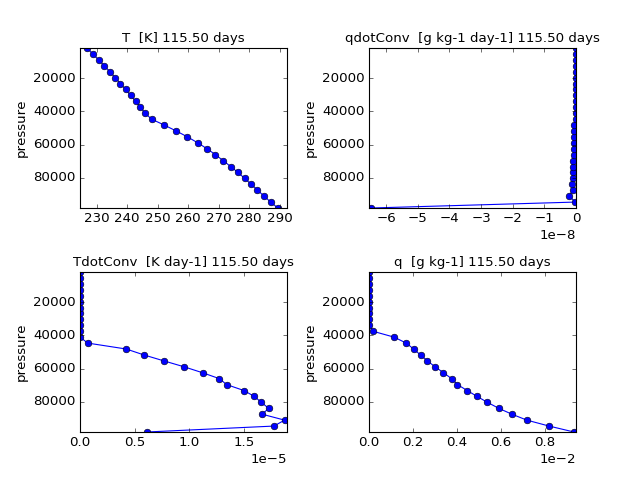

In [3]:
fed = climt.federation(rad, phys, conv, **kwargs)

for i in range(100000):

    climt_U = fed['U']
    dU = -(1./86400)*global_time_step*(climt_U - U)
    fed.step(Inc={'U':dU})
    #fed.step()
    #print conv.Inc['q'], conv.Inc['T']
    q = fed['q']
    q[q<0] = 0
    fed['q'] = q

In [ ]:
print conv['T']
print conv['p']